# Workshop on Domain-Specific Lanugages for Performance-Portable Weather and Climate Models

## Session 2A: Intro to Conditionals and Builtins

This notebook is provides an introduction to conditional statements in GT4PY

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gt4py
from gt4py import gtscript

## Scalar Conditionals
- Conditionals can be specified with a scalar or a field.
- Scalar conditionals behave fairly intuitively and are applied across a field

In [2]:
@gtscript.stencil(backend="numpy")
def conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], c: float
):

    with computation(PARALLEL), interval(...):
        if c > 0.:
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = 0

Initial Condition


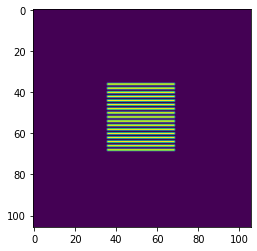

Output with c > 0


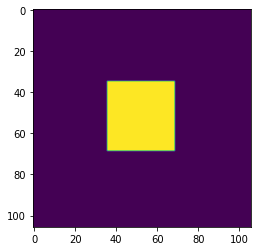

Output with c <= 0


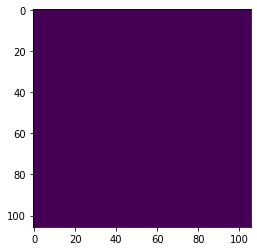

In [3]:
# Setting up the domain
nx = 100
halo = 3
shape = (nx+2*halo, nx+2*halo, 1)

# and the storages
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 2
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()

conditional_stencil(in_storage, out_storage, 1.0, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output with c > 0")
plt.imshow(out_storage.data[:,:,0])
plt.show()

conditional_stencil(in_storage, out_storage, -1.0, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output with c <= 0")
plt.imshow(out_storage.data[:,:,0])
plt.show()

## Field conditionals
Fields can also be used in conditional statements
- This allows different points to be in different branches

Initial Condition


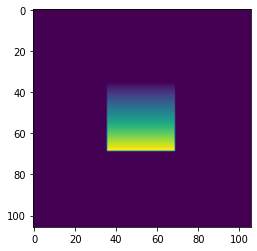

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Conditional Filter


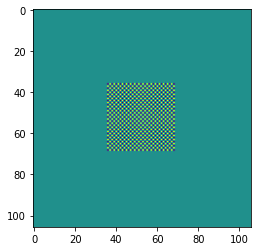

Output


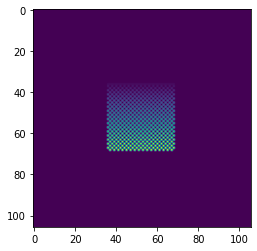

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  3.  0.  5.  0.  7.  0.  9.  0. 11.  0. 13.  0. 15.  0. 17.  0.
 19.  0. 21.  0. 23.  0. 25.  0. 27.  0. 29.  0. 31.  0. 33.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [4]:
@gtscript.stencil(backend="numpy")
def field_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], filter_storage: gtscript.Field[float]
):
    with computation(PARALLEL), interval(...):
        if filter_storage[-1, 0, 0] > 0.:
            out_storage = 0
        else:
            out_storage = in_storage[0, 0, 0]

# Setting up the domain
nx = 100
halo = 3
shape = (nx+2*halo, nx+2*halo, 1)

# and the storages
filter_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
filter_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 1
filter_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
filter_storage.data[halo + nx // 3 : halo + 2 * nx // 3, halo + nx // 3 : halo + 2 * nx // 3 : 2, :] *= -1

in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
for i in range(nx//3):
    in_storage.data[halo + nx // 3 + i, halo + nx // 3 : halo + 2 * nx // 3, :] = i+1

out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()
print(in_storage.data[:,45,0])


print("Conditional Filter")
plt.imshow(filter_storage.data[:,:,0])
plt.show()

field_conditional_stencil(in_storage, out_storage, filter_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output")
plt.imshow(out_storage.data[:,:,0])
plt.show()
print(out_storage.data[:,45,0])

## More on Field Conditionals
- Field conditionals use a mask to check branching
- This allows some fun referential tech

Initial Condition


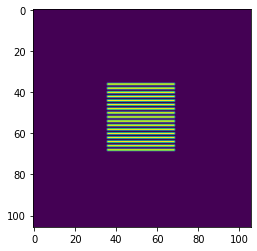

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output


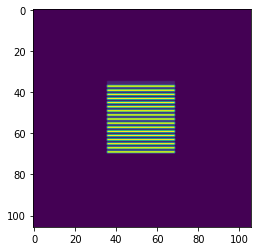

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.
  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [5]:
@gtscript.stencil(backend="numpy")
def field_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):

    with computation(PARALLEL), interval(...):
        if in_storage[-1, 0, 0] > 0.:
            out_storage = 10
        else:
            out_storage = in_storage[0, 0, 0] + in_storage[1, 0, 0]

# Setting up the domain
nx = 100
halo = 3
shape = (nx+2*halo, nx+2*halo, 1)

# and the storages
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 1
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()
print(in_storage.data[:,45,0])

field_conditional_stencil(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output")
plt.imshow(out_storage.data[:,:,0])
plt.show()
print(out_storage.data[:,45,0])

## Inlining Conditionals
If a conditional is known at compiletime it can writen using `__INLINED` to be optimized during compilation. Remember, any stencil arguments are read at runtime and so can't be inlined. Anything outside the scope of the stencil, however, is treated as a compile-time constant and frozen when the stencil is decorated with `gtscript.stencil`

Initial Condition


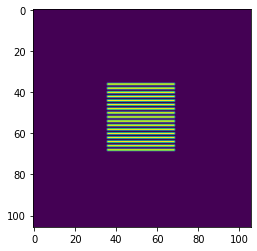

Output 1


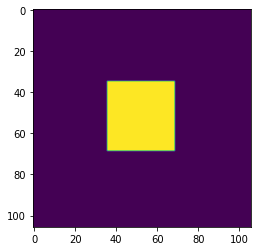

Output trying to change C


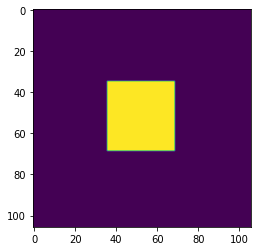

In [6]:
C = 1.0

@gtscript.stencil(backend="numpy")
def inlined_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):
    with computation(PARALLEL), interval(...):
        if __INLINED(C > 0.):
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = 0.0
            
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 2
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()

inlined_conditional_stencil(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

# stencil_call = gtscript.stencil(definition=inlined_conditional_stencil, backend="numpy", externals={"c":c})
# stencil_call(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output 1")
plt.imshow(out_storage.data[:,:,0])
plt.show()

#can we switch branches?
C = -1.0

inlined_conditional_stencil(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output trying to change C")
plt.imshow(out_storage.data[:,:,0])
plt.show()

Since C was set to 1 when the stencil was decorated, the stencil was compiled with `C=1`, and changing C won't change the behavior. 

When coded this way, C had to be set before the stencil definition, which is not very pythonic. Instead we could decorate the stencil later, when it is called:

Initial Condition


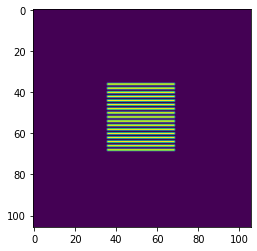

Output


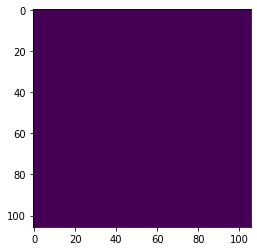

Output trying to change C again


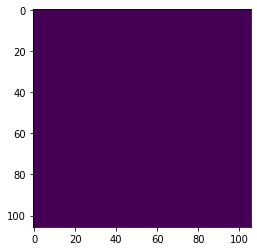

In [7]:
def inlined_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):
#     from _externals_ import C
    with computation(PARALLEL), interval(...):
        if __INLINED(C > 0.):
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = 0.0
            
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 2
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()

C = -1.0

stencil_call = gtscript.stencil(definition=inlined_conditional_stencil, backend="numpy")
# stencil_call(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output")
plt.imshow(out_storage.data[:,:,0])
plt.show()

C = 1.0

stencil_call = gtscript.stencil(definition=inlined_conditional_stencil, backend="numpy")

# inlined_conditional_stencil(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output trying to change C again")
plt.imshow(out_storage.data[:,:,0])
plt.show()

C is still frozen at the first decoration of our stencil, though. If we wanted to invoke our stencil with a different C we would have to pass it as an external:

Initial Condition


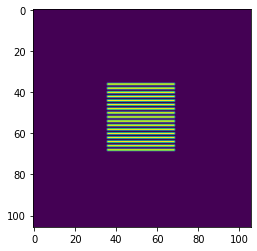

Output


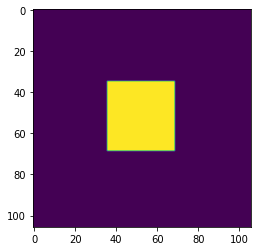

Output actually changing C


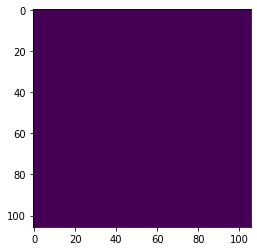

In [11]:
def inlined_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):
    from __externals__ import C
    with computation(PARALLEL), interval(...):
        if __INLINED(C > 0.):
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = 0.0
            
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 2
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()

stencil_call = gtscript.stencil(definition=inlined_conditional_stencil, backend="numpy", externals={"C":1.0})
stencil_call(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output")
plt.imshow(out_storage.data[:,:,0])
plt.show()

stencil_call = gtscript.stencil(definition=inlined_conditional_stencil, backend="numpy", externals={"C":-1.0})
stencil_call(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output actually changing C")
plt.imshow(out_storage.data[:,:,0])
plt.show()

This is a bit clunky, since we have to redefine the stencil to generate the new code, but you can do it.

### Why Inline?
it's faster!

In [14]:
C = 1.0

@gtscript.stencil(backend="numpy")
def inlined_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):
    with computation(PARALLEL), interval(...):
        if __INLINED(C > 0.):
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = 0.0

@gtscript.stencil(backend="numpy")
def conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], c: float
):

    with computation(PARALLEL), interval(...):
        if c > 0.:
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = 0

# Setting up the domain
nx = 100
halo = 3
shape = (nx+2*halo, nx+2*halo, 1)

# and the storages
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 2
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
            

#Timing the regular stencil:
print("Runtime conditional:")
fields = {"in_storage": in_storage, "out_storage": out_storage}
scalars = {"c": 1.0}
exec_info = {}

%timeit conditional_stencil(**fields, **scalars, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1), exec_info=exec_info)

call_time = exec_info['call_end_time']-exec_info['call_start_time']
run_time = exec_info['run_end_time']-exec_info['run_start_time']
print(f"  call_time = {call_time * 1000.} ms")
print(f"  run_time = {run_time * 1000.} ms")
print(f"  overhead = {(call_time - run_time)*1000.} ms")
print("")

#And the inlined version:
print("Inlined conditional:")
exec_info = {}

%timeit inlined_conditional_stencil(**fields, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1), exec_info=exec_info)

call_time = exec_info['call_end_time']-exec_info['call_start_time']
run_time = exec_info['run_end_time']-exec_info['run_start_time']
print(f"  call_time = {call_time * 1000.} ms")
print(f"  run_time = {run_time * 1000.} ms")
print(f"  overhead = {(call_time - run_time)*1000.} ms")
print("")

Runtime conditional:
319 µs ± 4.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
  call_time = 0.30542699983016064 ms
  run_time = 0.08535100005246932 ms
  overhead = 0.22007599977769132 ms

Inlined conditional:
264 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
  call_time = 0.2520549999189825 ms
  run_time = 0.03917200001524179 ms
  overhead = 0.2128829999037407 ms



## Example Application ##
Adding a flux limiter to the diffusion stencils:

In [ ]:
#remove
@gtscript.stencil(backend="numpy")
def flux_limit_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], alpha: float
):

    with computation(PARALLEL), interval(...):
        lap = (
            -4.0 * in_storage[0, 0, 0]
            + in_storage[1, 0, 0]
            + in_storage[-1, 0, 0]
            + in_storage[0, 1, 0]
            + in_storage[0, -1, 0]
        )
        
        x_flux = lap[1, 0, 0] - lap[0, 0, 0]
        y_flux = lap[0, 1, 0] - lap[0, 0, 0]
        x_flux = 0. if (x_flux[0, 0, 0] * (in_storage[1, 0, 0] - in_storage[0, 0, 0]) > 0.) else x_flux
        y_flux = 0. if (y_flux[0, 0, 0] * (in_storage[0, 1, 0] - in_storage[0, 0, 0]) > 0.) else y_flux
        
        out_storage = in_storage - alpha * (x_flux[0, 0, 0] - x_flux[-1, 0, 0] + y_flux[0, 0, 0] - y_flux[0, -1, 0])
        

nx = 100
halo = 3
shape = (nx + 2 * halo, nx + 2 * halo, 1)
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo + 2 * nx // 3, halo + nx // 3 : halo + 2 * nx // 3, :] = 1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

print("Initial Condition")
plt.imshow(in_storage.data[:, :, 0])
plt.show()

alpha = 1.0 / 32.0
for i in range(500):
    flux_limit_stencil(
        in_storage, out_storage, alpha, origin=(halo, halo, 0), domain=(nx, nx, 1)
    )
    in_storage.data[:] = out_storage.data[:]

print("Output")
plt.imshow(out_storage.data[:, :, 0])
plt.show()

## Example 2
Filling in negative values in a field

In [ ]:
#remove
@gtscript.stencil(backend="numpy")
def flux_limit_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], alpha: float
):

    with computation(PARALLEL), interval(...):
        lap = (
            -4.0 * in_storage[0, 0, 0]
            + in_storage[1, 0, 0]
            + in_storage[-1, 0, 0]
            + in_storage[0, 1, 0]
            + in_storage[0, -1, 0]
        )
        
        x_flux = lap[1, 0, 0] - lap[0, 0, 0]
        y_flux = lap[0, 1, 0] - lap[0, 0, 0]
        x_flux = 0. if (x_flux[0, 0, 0] * (in_storage[1, 0, 0] - in_storage[0, 0, 0]) > 0.) else x_flux
        y_flux = 0. if (y_flux[0, 0, 0] * (in_storage[0, 1, 0] - in_storage[0, 0, 0]) > 0.) else y_flux
        
        out_storage = in_storage - alpha * (x_flux[0, 0, 0] - x_flux[-1, 0, 0] + y_flux[0, 0, 0] - y_flux[0, -1, 0])

@gtscript.stencil(backend="numpy")
def fill_horizontal(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):
    with computation(PARALLEL), interval(...):
        fix_forward = 0.
        fix_backward = 0.
        if in_storage[0, 0, 0] < 0:
            if in_storage[-1, 0, 0] > 0.:
                fix_forward = min(abs(in_storage[0, 0, 0]), in_storage[-1, 0, 0])
                in_storage[0, 0, 0] = in_storage[0, 0, 0] + fix_forward[0, 0, 0]
                
        if fix_forward[1, 0, 0] != 0:
            in_storage[0, 0, 0] = in_storage[0, 0, 0] - fix_forward[1, 0, 0]
        
        if in_storage[0, 0, 0] < 0:
            if in_storage[1, 0, 0] >= 0.:
                fix_backward = min(abs(in_storage[0, 0, 0]), in_storage[1, 0, 0])
                in_storage[0, 0, 0] = in_storage[0, 0, 0] + fix_backward[0, 0, 0]
                
        if fix_backward[1, 0, 0] != 0:
            in_storage[0, 0, 0] = in_storage[0, 0, 0] - fix_backward[-1, 0, 0]
    

nx = 101
halo = 3
alpha = 1.0 / 32.0
shape = (nx + 2 * halo, nx + 2 * halo, 1)
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
fix_previous = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = 3
in_storage.data[halo + nx // 3 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

print("Initial Condition")
plt.imshow(in_storage.data[:, :, 0])
plt.show()
print(in_storage.data[:,45,0], np.mean(in_storage.data))

# for i in range(500):
#     flux_limit_stencil(in_storage, out_storage, alpha, origin=(halo, halo, 0), domain=(nx, nx, 1))

fill_horizontal(in_storage, out_storage, origin=(halo, halo, 0), domain=(nx, nx, 1))
    
print("Output")
plt.imshow(in_storage.data[:, :, 0])
plt.show()
print(in_storage.data[:,45,0], np.mean(in_storage.data))